calculate mult

In [1]:
loadlevel = 0.1

graphnamelist = ["dring","rrg"]
swlist = [120,140,160,180,200]
deg = 96
swpersn = 10
filenameprefix = "/home/annzhou/DRing/src/emp/datacentre/scalegraphfiles2/"
flowfilenameprefix = "/home/annzhou/DRing/src/emp/datacentre/flowfiles/c2s_"
for sw in swlist:
    svr = sw*56
    for graphname in graphnamelist:
        if graphname=="dring":
            filename = f"{filenameprefix}dring_deg{deg}_sw{sw}_sn{sw//swpersn}_i1.edgelist"
        elif graphname=="rrg":
            filename = f"{filenameprefix}rrg_deg{deg}_sw{sw}_svr{svr}_os1_i1.edgelist"
        with open(filename,'r') as f:
            numlink = len(f.readlines())
            
        flowfile = f"{flowfilenameprefix}{svr}_{sw}_{deg}_{int(sw*0.9)}_{sw-int(sw*0.9)}_1_0_0_0"
        bytespermult = 0
        with open(flowfile,'r') as f:
            lines = f.readlines()
            for line in lines:
                tokens = line.split(',')
                bytespermult += int(tokens[2])
            
        bytesperlink = 894784*1500*0.2 # 894784 packets per second, 1500B per packet, 200ms
        totalbytes = bytesperlink*numlink # *2 for 2 directions, /2 for 2 hops per flow
        usablebytes = totalbytes*loadlevel
        mult = usablebytes/bytespermult
        print(f"{filename}: {mult}")

/home/annzhou/DRing/src/emp/datacentre/scalegraphfiles2/dring_deg96_sw120_sn12_i1.edgelist: 0.4746279147721861
/home/annzhou/DRing/src/emp/datacentre/scalegraphfiles2/rrg_deg96_sw120_svr6720_os1_i1.edgelist: 0.4746279147721861
/home/annzhou/DRing/src/emp/datacentre/scalegraphfiles2/dring_deg96_sw140_sn14_i1.edgelist: 0.4052595491890543
/home/annzhou/DRing/src/emp/datacentre/scalegraphfiles2/rrg_deg96_sw140_svr7840_os1_i1.edgelist: 0.4052595491890543
/home/annzhou/DRing/src/emp/datacentre/scalegraphfiles2/dring_deg96_sw160_sn16_i1.edgelist: 0.35640853132328815
/home/annzhou/DRing/src/emp/datacentre/scalegraphfiles2/rrg_deg96_sw160_svr8960_os1_i1.edgelist: 0.35640853132328815
/home/annzhou/DRing/src/emp/datacentre/scalegraphfiles2/dring_deg96_sw180_sn18_i1.edgelist: 0.31642056605823254
/home/annzhou/DRing/src/emp/datacentre/scalegraphfiles2/rrg_deg96_sw180_svr10080_os1_i1.edgelist: 0.31642056605823254
/home/annzhou/DRing/src/emp/datacentre/scalegraphfiles2/dring_deg96_sw200_sn20_i1.edgel

generate conffile

In [5]:
graphname = "dring"
routingname = "su3"
rt1 = "su"
rt2 = 3
swlist = range(120,181,20)
multlistarr = [[0,47,100],[0,41,100],[0,36,100],[0,32,100]]
sseedarr = range(1,6)
numport = 96
swpersn = 10

conffile = f"/home/annzhou/DRing/src/emp/datacentre/experiments/scalability2/{graphname}.conf"
with open(conffile,'w') as f:
    for inumsw,numsw in enumerate(swlist):
        multlist = multlistarr[inumsw]
        multstr = f"{multlist[0]}_{multlist[1]}_{multlist[2]}"
        numserver = numsw*56
        c = int(numsw*0.9)
        s = numsw-c

        trafficfile = f"flowfiles/c2s_{numserver}_{numsw}_{numport}_{c}_{s}_{multstr}_0"
        dringqvarfile = f"qvarfiles/qvar_{graphname}_{numserver}_{numsw}_{numport}_0_0_{routingname}_c2s_{c}_{s}_0_{multstr}_2_0_64"
        dringnetpathfile = f"netpathfiles/netpath_{routingname}_{graphname}_{numserver}_{numsw}_{numport}"
        dringscalegraphfile = f"scalegraphfiles2/dring_deg{numport}_sw{numsw}_sn{numsw//swpersn}_i1.edgelist"
        dringserverfile = f"serverfiles/{graphname}_{numserver}_{numsw}_{numport}"
        makedring = "MAKE"
        for sseed in sseedarr:
            f.write(f"./run.sh RRG {makedring} {numsw} {numserver} {numport} {graphname}_{numsw} NEW_FILE {dringscalegraphfile} {multlist[0]} {multlist[1]} {multlist[2]} 0 0 0 0 0 0 {rt1} {rt2} {trafficfile} {dringserverfile} {sseed} {dringnetpathfile} {dringqvarfile} 64 50 150 200 0 0 > m_scalability2_{graphname}_{numsw}_{sseed}.log\n")
            makedring = "NOMAKE"

In [6]:
graphname = "rrg"
routingname = "su3"
rt1 = "su"
rt2 = 3
swlist = range(120,181,20)
multlistarr = [[0,47,100],[0,41,100],[0,36,100],[0,32,100]]
sseedarr = range(1,6)
numport = 96
swpersn = 10

conffile = f"/home/annzhou/DRing/src/emp/datacentre/experiments/scalability2/{graphname}.conf"
with open(conffile,'w') as f:
    for inumsw,numsw in enumerate(swlist):
        multlist = multlistarr[inumsw]
        multstr = f"{multlist[0]}_{multlist[1]}_{multlist[2]}"
        numserver = numsw*56
        c = int(numsw*0.9)
        s = numsw-c

        trafficfile = f"flowfiles/c2s_{numserver}_{numsw}_{numport}_{c}_{s}_{multstr}_0"
        dringqvarfile = f"qvarfiles/qvar_{graphname}_{numserver}_{numsw}_{numport}_0_0_{routingname}_c2s_{c}_{s}_0_{multstr}_2_0_64"
        dringnetpathfile = f"netpathfiles/netpath_{routingname}_{graphname}_{numserver}_{numsw}_{numport}"
        dringscalegraphfile = f"scalegraphfiles2/rrg_deg{numport}_sw{numsw}_svr{numserver}_os1_i1.edgelist"
        dringserverfile = f"serverfiles/{graphname}_{numserver}_{numsw}_{numport}"
        makedring = "MAKE"
        for sseed in sseedarr:
            f.write(f"./run.sh RRG {makedring} {numsw} {numserver} {numport} {graphname}_{numsw} NEW_FILE {dringscalegraphfile} {multlist[0]} {multlist[1]} {multlist[2]} 0 0 0 0 0 0 {rt1} {rt2} {trafficfile} {dringserverfile} {sseed} {dringnetpathfile} {dringqvarfile} 64 50 150 200 0 0 > m_scalability2_{graphname}_{numsw}_{sseed}.log\n")
            makedring = "NOMAKE"

generate sumfile & picklefile

In [ ]:
import pickle

filename = "rrg"

homedir = "/home/annzhou"
datadict = dict()
conffile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability2/{filename}.conf"
sumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability2/{filename}.txt"
with open(conffile,'r') as f:
    with open(sumfile,'a') as sumf:
        lines = f.readlines()
        for line in lines:
            tokens = line.split()
            logfile = tokens[32]
            sizelist = list()
            durationlist = list()
            startlist = list()
            with open(f"{homedir}/DRing/src/emp/datacentre/{logfile}",'r') as logf:
                print(logfile)
                loglines = logf.readlines()
                for logline in loglines:
                    logtokens = logline.split()
                    if logtokens[0] == "FCT":
                        durationlist.append(float(logtokens[2]))
                        sizelist.append(int(logtokens[1]))
                        startlist.append(float(logtokens[3]))
            datadict[logfile] = [durationlist,sizelist,startlist]
            durationlist.sort()
            sumf.write(f"{logfile}\t{sum(durationlist)/len(durationlist)}\t{durationlist[int(len(durationlist)*0.5)]}\t{durationlist[int(len(durationlist)*0.99)]}\t{durationlist[int(len(durationlist)*0.9999)]}\n")

with open(f'{homedir}/DRing/src/emp/datacentre/experiments/scalability2/{filename}.pickle', 'wb') as handle:
    pickle.dump(datadict, handle, protocol=pickle.HIGHEST_PROTOCOL)

plot

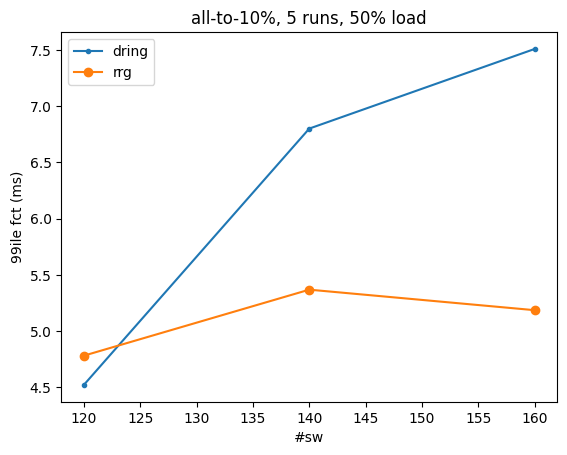

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

homedir = "/home/annzhou"
dringsumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability2/dring.txt"
rrgsumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability2/rrg.txt"
swlist = [120,140,160]
sseedarr = range(1,6)

dringylist = list()
with open(dringsumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        dringseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability2_dring_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    dringseedlist.append(n99fct)
        dringylist.append(sum(dringseedlist)/len(dringseedlist))
plt.plot(swlist,dringylist,label="dring",marker='.')

rrgylist = list()
with open(rrgsumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        rrgseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability2_rrg_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[3])
                    rrgseedlist.append(n99fct)
        rrgylist.append(sum(rrgseedlist)/len(rrgseedlist))
plt.plot(swlist,rrgylist,label="rrg",marker='o')

plt.legend()
plt.xlabel('#sw')
plt.ylabel('99ile fct (ms)')
plt.title(f'all-to-10%, 5 runs, 50% load')
# plt.ylim(0,20)
# plt.savefig(f"{homedir}/DRing/src/emp/datacentre/experiments/scalability/{trafficname}.png", dpi=500)
plt.show()

delete

In [ ]:
import os

homedir = "/home/annzhou"
dringdir = f"{homedir}/DRing/src/emp/datacentre"
for filedir in os.listdir(dringdir):
    if os.path.isfile(os.path.join(dringdir, filedir)):
        tokens = filedir.split("_")
        if tokens[0]=="m" and tokens[1]=="scalability2" and tokens[-1].split('.')[-1]=="log":
            print(filedir)
            os.remove(f"{homedir}/DRing/src/emp/datacentre/{filedir}")
        if (tokens[0]=="rrg" or tokens[0]=="leafspine") and tokens[1]=="log":
            print(filedir)
            os.remove(f"{homedir}/DRing/src/emp/datacentre/{filedir}")
        if (tokens[-1]=="run") and ((tokens[0]=="leafspine" and tokens[1]=="leafspine") or (tokens[0]=="rrg" and (tokens[1]=="rrg" or tokens[1]=="dring"))):
            print(filedir)
            os.remove(f"{homedir}/DRing/src/emp/datacentre/{filedir}")